# Boston Housing, regression

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
from keras.datasets import boston_housing
(train_data, train_label), (test_data, test_label) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

57026/57026 [==============================] - 0s 2us/step
(404, 13)
(102, 13)


In [3]:
# Preprocessing

#standard scaling

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std

In [4]:
mean = test_data.mean(axis=0)
std = train_data.std(axis=0)
test_data = (test_data - mean) / std

In [7]:
# Build model
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) #use identical activation for regression

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model

In [8]:
# K-fold validation
#use when data is not enough

k = 4
num_val_samples = len(train_data) // k
all_score = []

for i in range(k):
    print('processing fold #', i)

    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_labels = train_label[i*num_val_samples : (i+1)*num_val_samples]

    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_labels = np.concatenate([train_label[:i*num_val_samples], train_label[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_labels, batch_size=1, epochs=20, verbose=0) #verbose, skip progress

    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_score.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
print(all_score)
print(np.mean(all_score))

[2.2667617797851562, 2.8194386959075928, 2.5663459300994873, 2.63551926612854]
2.572016417980194


In [13]:
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k
all_scores = []

for i in range(k):
  print('processing fold #', i)

  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_labels = train_label[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate([train_data[: i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_labels =  np.concatenate([train_label[:i*num_val_samples], train_label[(i+1)*num_val_samples :]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_labels, batch_size=1, epochs=num_epochs, verbose=0, validation_data=(val_data, val_labels))

  mae = history.history['mae']

  all_scores.append(mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


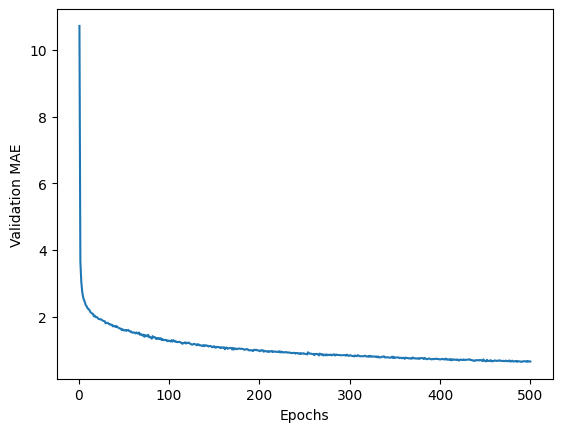

In [14]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show()